In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import os
from os.path import join as oj
import sys, time
sys.path.insert(1, oj(sys.path[0], '..'))  # insert parent path
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import pmlb
from tqdm import tqdm
from copy import deepcopy
import pickle as pkl
import pandas as pd
import data
import numpy.linalg as npl 
import numpy.random as npr
from scipy.optimize import minimize
from scipy.stats import ortho_group
import pickle
from sklearn.linear_model import RidgeCV, LinearRegression

save_dir = 'results'
os.makedirs(save_dir, exist_ok=True)

**This nb explores the bias-variance tradeoff as d/n is varied**

## Plot Results from files

In [2]:
import matplotlib as mpl
label_size = 25
mpl.rcParams['xtick.labelsize'] = label_size 
mpl.rcParams['ytick.labelsize'] = label_size 
mpl.rcParams['axes.labelsize'] = label_size
mpl.rcParams['axes.titlesize'] = label_size
mpl.rcParams['figure.titlesize'] = label_size
# mpl.rcParams['lines.markersize'] = 8
mpl.rcParams['grid.linewidth'] = 2.5
mpl.rcParams['legend.fontsize'] = 25
# pylab.rcParams['xtick.major.pad']=5
# pylab.rcParams['ytick.major.pad']=5

In [3]:
cs = sns.color_palette()

In [5]:
# save_fig = False
# for prefix in ['identity', 'identity_high_dim',  'cosine', 'cosine_high_dim']:
#     if "identity" in prefix:
#         suffix = '(Gauss. Des., '
#     else:
#         suffix = '(Cos. Des., '
    
#     if 'high_dim' in prefix:
#         d_star = 400./200
#         suffix += '$d_\star > n$, '
#     else:
#         d_star = 100./200
#         suffix += '$d_\star < n$, '
        

#     for noise_std in [0.1, 1]:        
#         results = pickle.load(open("ridge_%s_sigma_%d_new_bias_variance.txt"%(prefix, noise_std), "rb"))
#         for fig_suffix, title_suffix in zip(['fig/'+prefix+str(int(noise_std))+'detailed_', 'fig/'+prefix+str(int(noise_std))], 
#                                             [suffix+'$\sigma = %.1f$)'%noise_std, '']):
#             for j, n in enumerate(results['ns']):
#                 plt.figure(figsize=[8, 6])
#                 plt.loglog(results["gammas"], results["mse_test"].mean(0)[:, j], color=cs[0], label='Ridge', linestyle='-', linewidth=4.)
#                 plt.loglog(results["gammas"], results["ols_test"].mean(0)[:, j], color=cs[1], label='OLS', linestyle='--', linewidth=4.)
#                 plt.semilogx(results["gammas"], results["zero_err"]*np.ones_like(results["gammas"]), label='Zero-Est.', linestyle=':', color=cs[2], linewidth=5.)
#                 plt.axvline(d_star, linestyle='--', color='k', alpha=.5, linewidth=3.)
#                 plt.xlabel('d/n')
#                 plt.title(r'Test MSE %s'%title_suffix)
#                 plt.legend(frameon=False)
#                 plt.grid(True, alpha=0.5, linewidth=1.)
#                 plt.tight_layout()
#                 if save_fig:
#                     plt.savefig(fig_suffix+'test_mse.pdf')
# #                     plt.close()
#                 plt.show()


#                 plt.figure(figsize=[8, 6])
#                 plt.loglog(results["gammas"], results["t_pred_bias"][:, j], label='Bias', linestyle='-', linewidth=4., marker='D', markersize=8, alpha=1. ,color=cs[0])
#                 plt.loglog(results["gammas"], results["t_pred_variance"][:, j], label='Variance', linestyle=':', linewidth=4., marker='*', markersize=12, alpha=1. ,color=cs[0])
#                 plt.axvline(d_star, linestyle='--', color='k', alpha=.5, linewidth=3.)
#                 plt.xlabel('d/n')
#                 plt.title(r'Ridge %s'%title_suffix)
#                 plt.legend(frameon=False)
#                 plt.grid(True, alpha=0.5, linewidth=1.)
#                 plt.tight_layout()
#                 if save_fig:
#                     plt.savefig(fig_suffix+'bias_variance_ridge.pdf')
#                     plt.close()
# #                 plt.show()

#                 plt.figure(figsize=[8, 6])
#                 plt.loglog(results["gammas"], results["ols_pred_bias"][:, j], label='Bias', linestyle='-', linewidth=4., marker='D', markersize=8, alpha=1. ,color=cs[1])
#                 plt.loglog(results["gammas"], results["ols_pred_variance"][:, j], label='Variance', linestyle=':', linewidth=4., marker='*', markersize=12, alpha=1. ,color=cs[1])
#                 plt.axvline(d_star, linestyle='--', color='k', alpha=.5, linewidth=3.)
#                 plt.xlabel('d/n')
#                 plt.title(r'OLS %s'%title_suffix)
#                 plt.legend(frameon=False)
#                 plt.grid(True, alpha=0.5, linewidth=1.)
#                 plt.tight_layout()
#                 if save_fig:
#                     plt.savefig(fig_suffix+'bias_variance_ols.pdf')
#                     plt.close()
# #                 plt.show()

## Run to get results

0 20 200
0 28 200
0 41 200
0 60 200
0 87 200
0 126 200
0 178 200
0 200 200
0 224 200
0 251 200
0 316 200
0 400 200
0 458 200
0 662 200
0 957 200
0 1383 200
0 2000 200
0 4000 200


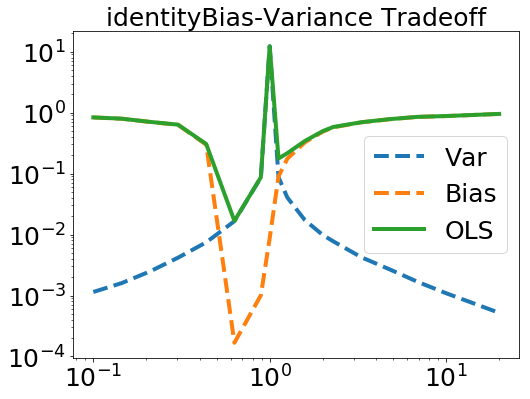

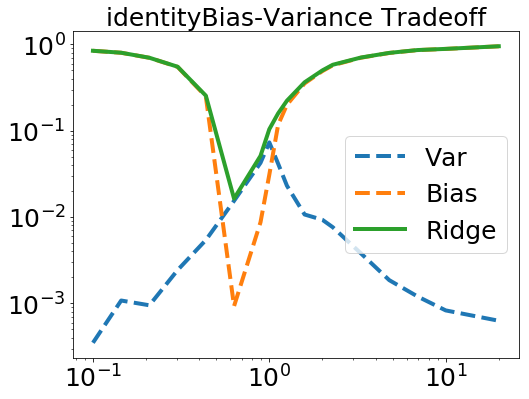

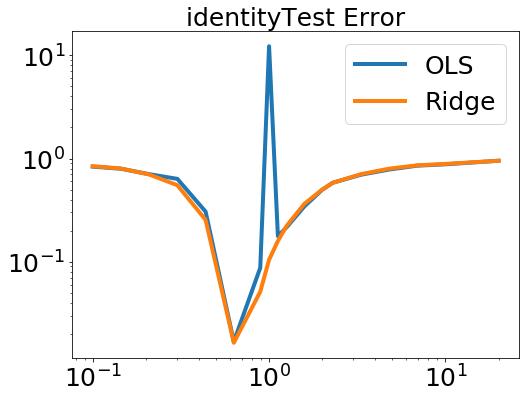

0 20 200
0 28 200
0 41 200
0 60 200
0 87 200
0 126 200
0 178 200
0 200 200
0 224 200
0 251 200
0 316 200
0 400 200
0 458 200
0 662 200
0 957 200
0 1383 200
0 2000 200
0 4000 200


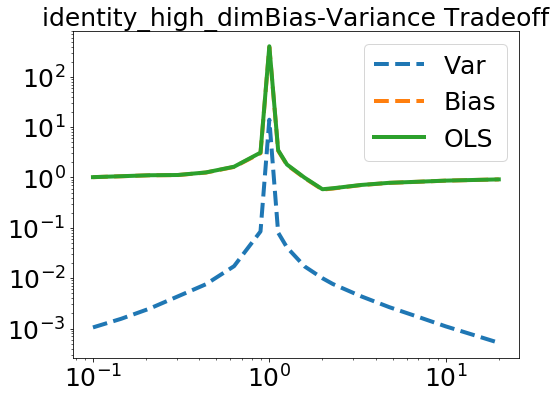

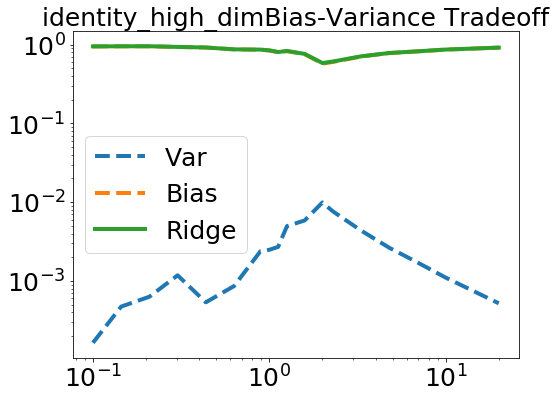

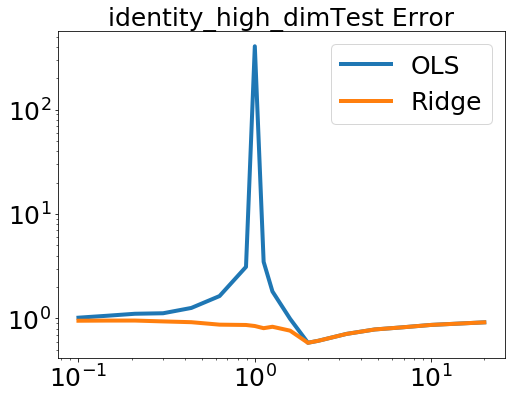

0 20 200
0 28 200
0 41 200
0 60 200
0 87 200
0 126 200
0 178 200
0 200 200
0 224 200
0 251 200
0 316 200
0 400 200
0 458 200
0 662 200
0 957 200
0 1383 200
0 2000 200
0 4000 200


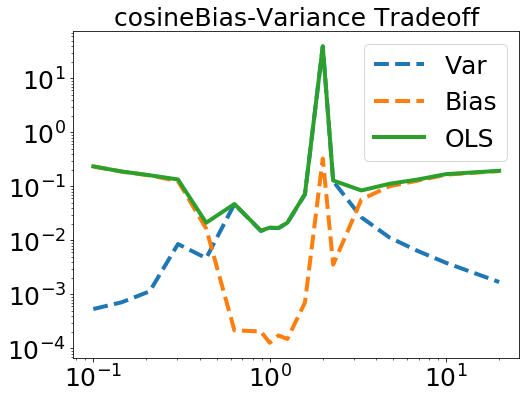

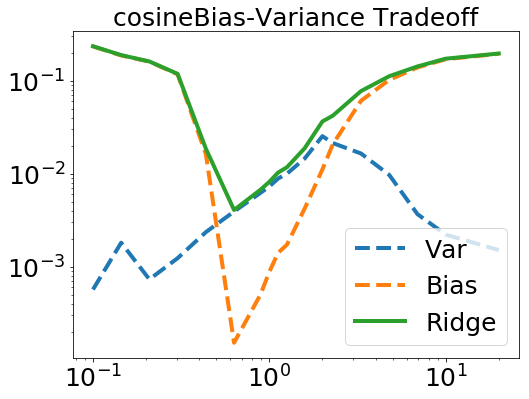

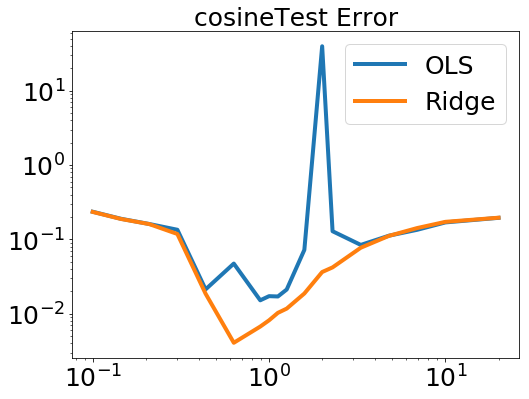

0 20 200
0 28 200
0 41 200
0 60 200
0 87 200
0 126 200
0 178 200
0 200 200
0 224 200
0 251 200
0 316 200
0 400 200
0 458 200
0 662 200
0 957 200
0 1383 200
0 2000 200
0 4000 200


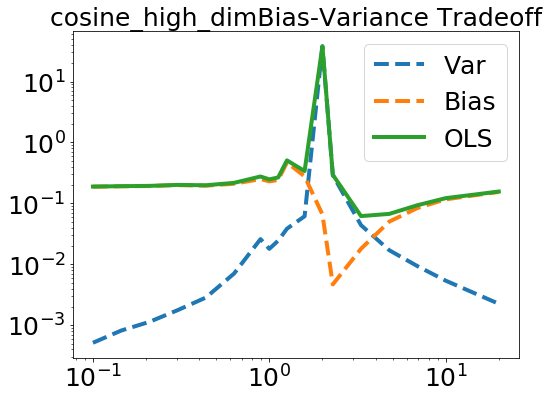

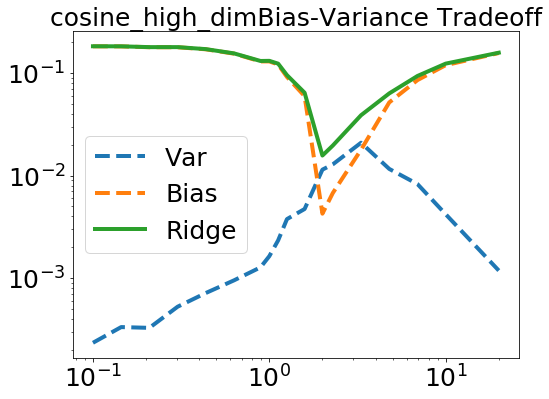

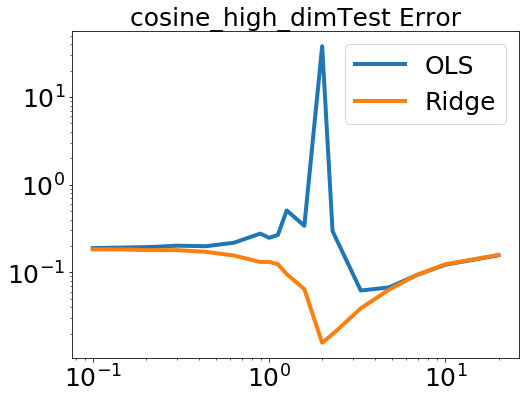

0 20 200
0 28 200
0 41 200
0 60 200
0 87 200
0 126 200
0 178 200
0 200 200
0 224 200
0 251 200
0 316 200
0 400 200
0 458 200
0 662 200
0 957 200
0 1383 200
0 2000 200
0 4000 200


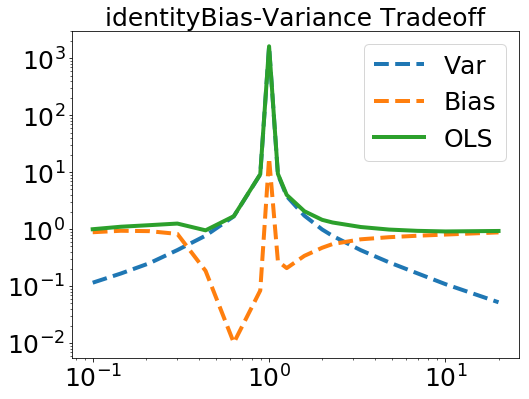

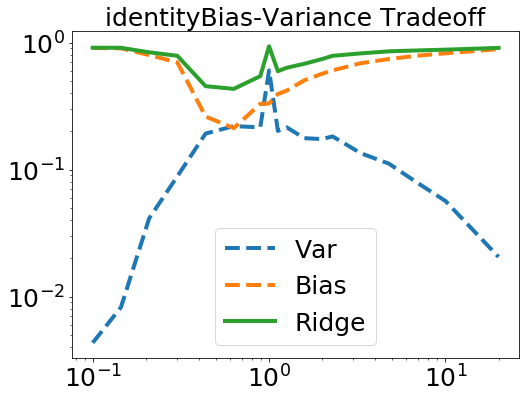

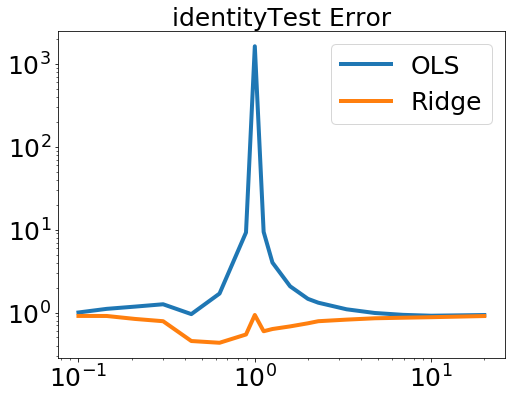

0 20 200
0 28 200
0 41 200
0 60 200
0 87 200
0 126 200
0 178 200
0 200 200
0 224 200
0 251 200
0 316 200
0 400 200
0 458 200
0 662 200
0 957 200
0 1383 200
0 2000 200
0 4000 200


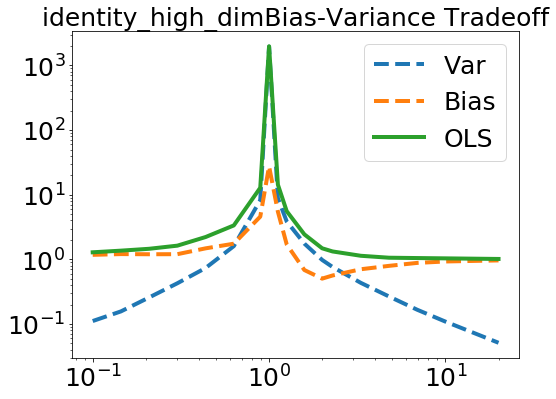

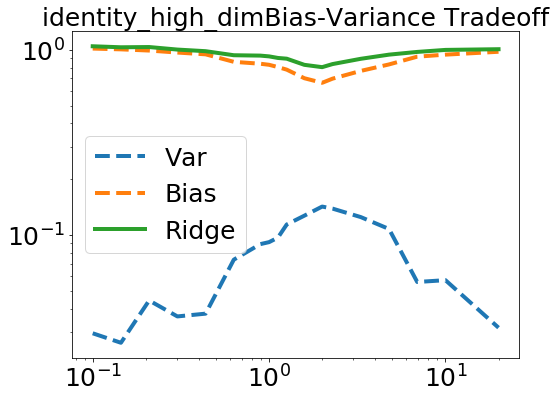

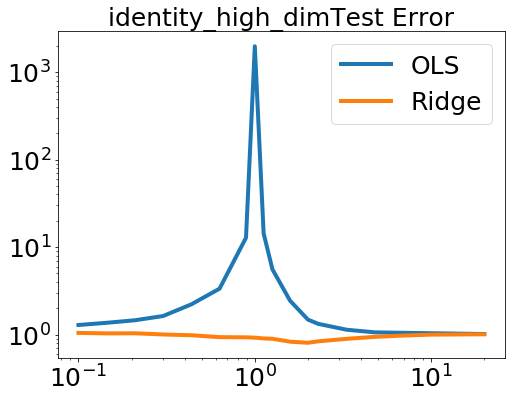

0 20 200
0 28 200
0 41 200
0 60 200
0 87 200
0 126 200
0 178 200
0 200 200
0 224 200
0 251 200
0 316 200
0 400 200
0 458 200
0 662 200
0 957 200
0 1383 200
0 2000 200
0 4000 200


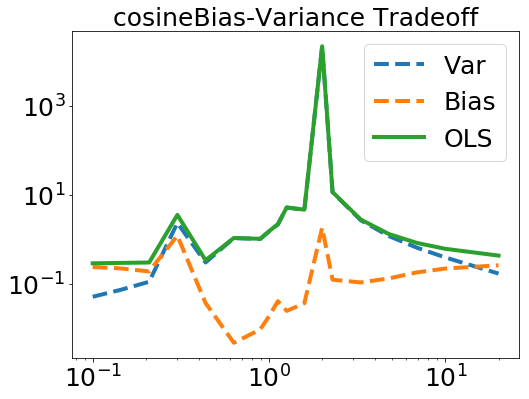

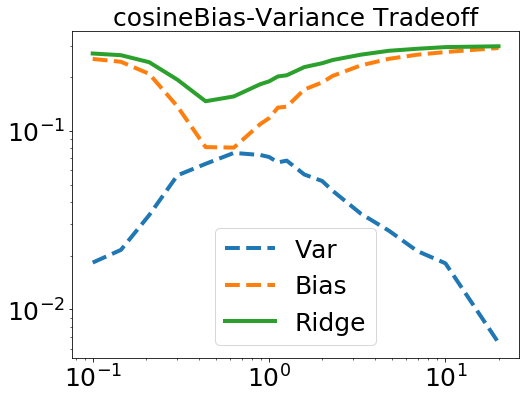

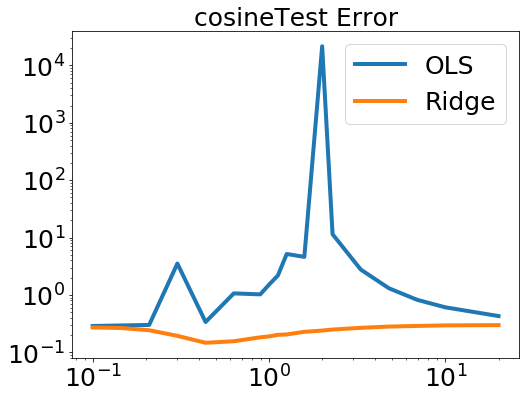

0 20 200
0 28 200
0 41 200
0 60 200
0 87 200
0 126 200
0 178 200
0 200 200
0 224 200
0 251 200
0 316 200
0 400 200
0 458 200
0 662 200
0 957 200
0 1383 200
0 2000 200
0 4000 200


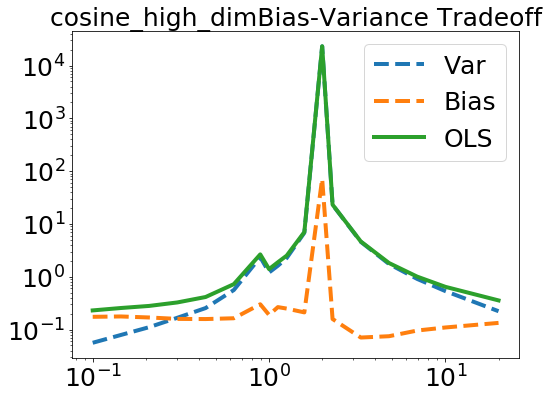

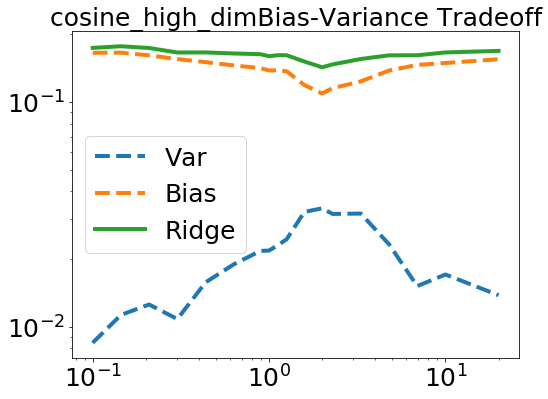

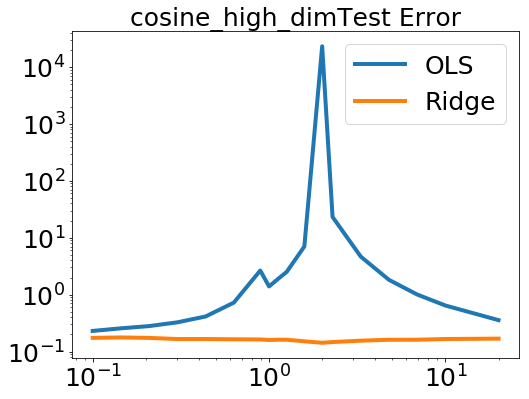

In [440]:
save_data = True

npr.seed(121123)
num_trials = 100
gammas = np.hstack((np.logspace(-1, -0.2, 6),
        np.logspace(-0.05, 0.1, 4),
                    np.asarray([2.]),
        np.logspace(0.2, 1, 6), np.asarray([20.]))
                                      )
gammas = np.sort(gammas)

for noise_std in [0.1, 1.]:
    n_test = 1000

    ns = np.array([200])
    ds = np.asarray(ns[0]*gammas, dtype=int)
    dmax = max(ds)

    ols_train = np.zeros((num_trials, len(ds), len(ns)))
    ols_test = np.zeros((num_trials, len(ds), len(ns)))
    ols_pred_bias = np.zeros((len(ds), len(ns)))
    ols_pred_variance = np.zeros((len(ds), len(ns)))


    mse_train = np.zeros((num_trials, len(ds), len(ns)))
    mse_test = np.zeros((num_trials, len(ds), len(ns)))
    t_pred_bias = np.zeros((len(ds), len(ns)))
    t_pred_variance = np.zeros((len(ds), len(ns)))

    X_train = npr.randn(max(ns), dmax)
    X_test = npr.randn(n_test, dmax)

    for prefix in ['identity','identity_high_dim', 'cosine', 'cosine_high_dim']:
        if 'cosine' in prefix :
            eigs = np.zeros(dmax)
            eigs = np.abs(np.cos(np.arange(dmax)))
            eigs[::2] = 0.
            eigs = np.diag(eigs)
            X_train = X_train @ eigs
            X_test = X_test @ eigs

        start, d0 = 0, 100
        beta_norm = 1.
        if 'high_dim' in prefix:
            start, d0 = 0, 400
            beta_norm = 1.

        beta_fixed = npr.randn(d0)
        beta_fixed /= npl.norm(beta_fixed)
        beta_fixed *= beta_norm

        y_train_star = X_train[:,start:start+d0] @ beta_fixed
        y_test =  X_test[:, start:start+d0] @ beta_fixed

        for k, n in enumerate(ns):
            for j, d in enumerate(ds):
                t_preds = np.zeros((num_trials, n_test))
                ols_preds = np.zeros((num_trials, n_test))

                for i in range(num_trials):
                    if i==0:
                        print(i, d, n)

                    y_train = y_train_star + noise_std * npr.randn(n)

                    m = RidgeCV(fit_intercept=False, alphas=np.logspace(-4, 4, num=40, base=10))
                    m.fit(X_train[:, :d], y_train)
                    t_preds[i, :] = X_test[:, :d] @ m.coef_

                    mse_train[i, j, k] = npl.norm(y_train - X_train[:, :d] @ m.coef_)**2 / n
                    mse_test[i, j, k] = npl.norm(y_test - t_preds[i, :])**2 /  n_test

                    ols = LinearRegression(fit_intercept=False)
                    ols.fit(X_train[:, :d], y_train)
                    ols_preds[i, :] = X_test[:, :d] @ ols.coef_

                    ols_train[i, j, k] = npl.norm(y_train - X_train[:, :d] @ ols.coef_)**2 / n
                    ols_test[i, j, k] = npl.norm(y_test - ols_preds[i, :])**2 / n_test

                pmean = t_preds.mean(0)
                t_pred_variance[j, k] = np.sum((t_preds - pmean)**2)/num_trials/n_test
                t_pred_bias[j, k]  = np.sum((pmean-y_test)**2)/n_test

                pmean = ols_preds.mean(0)
                ols_pred_variance[j, k] = np.sum((ols_preds - pmean)**2)/num_trials/n_test
                ols_pred_bias[j, k]  = np.sum((pmean - y_test)**2)/n_test


            # save results
            if save_data:
                file_name = 'ridge_%s_sigma_%d_new_bias_variance.txt'%(prefix, noise_std)
                results = {'ns': ns, 'ds': ds, 'gammas': gammas, 'num_trials': num_trials, 'beta_norm': npl.norm(beta_fixed),  
                           'mse_test': mse_test, 't_pred_variance': t_pred_variance, 't_pred_bias':t_pred_bias,
                           'ols_test': ols_test, 'ols_pred_variance': ols_pred_variance, 'ols_pred_bias':ols_pred_bias,
                           'zero_err': npl.norm(y_test)**2/n_test
                          }
                #     'mdl_practice': mdl_practice, 'mdl_theory_lam': mdl_theory_lam, 'mdl_theory':mdl_theory,  'mdl_theory_mean': mdl_theory_mean}
                file = open(file_name, 'wb')
                pickle.dump(results, file)
                file.close()

            ## plot results
            plt.figure(figsize=[8, 6])
            plt.title(prefix+'Bias-Variance Tradeoff')
            plt.loglog(gammas, ols_pred_variance[:, 0], label='Var', linestyle='--', linewidth=4.)
            plt.loglog(gammas, ols_pred_bias[:, 0], label='Bias', linestyle='--', linewidth=4.)
            plt.loglog(gammas, ols_test.mean(0)[:, 0], label='OLS', linestyle='-', linewidth=4.)
            plt.legend()
            plt.show()

            plt.figure(figsize=[8, 6])
            plt.title(prefix+'Bias-Variance Tradeoff')
            plt.loglog(gammas, t_pred_variance[:, 0], label='Var', linestyle='--', linewidth=4.)
            plt.loglog(gammas, t_pred_bias[:, 0], label='Bias', linestyle='--', linewidth=4.)
            plt.loglog(gammas, mse_test.mean(0)[:, 0], label='Ridge', linestyle='-', linewidth=4.)
            plt.legend()
            plt.show()

            plt.figure(figsize=[8, 6])
            plt.title(prefix+'Test Error')
            plt.loglog(gammas, ols_test.mean(0)[:, 0], label='OLS', linestyle='-', linewidth=4.)
            plt.loglog(gammas, mse_test.mean(0)[:, 0], label='Ridge', linestyle='-', linewidth=4.)
            plt.legend()
            plt.show()

# Black plots

In [6]:
plt.style.use('dark_background')

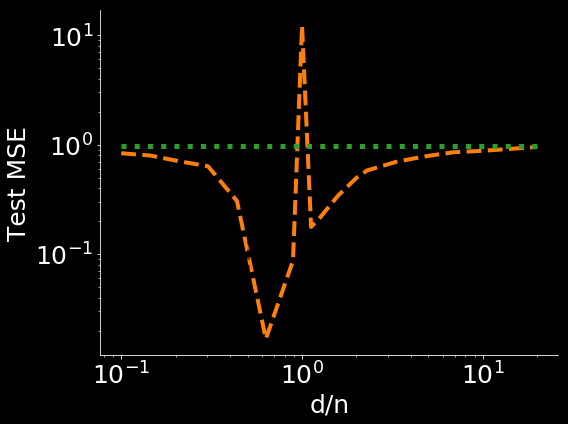

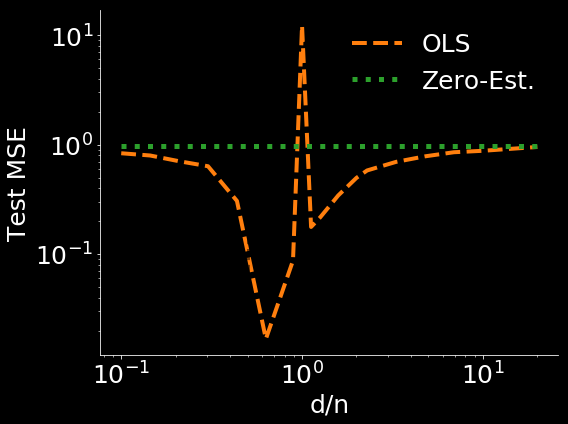

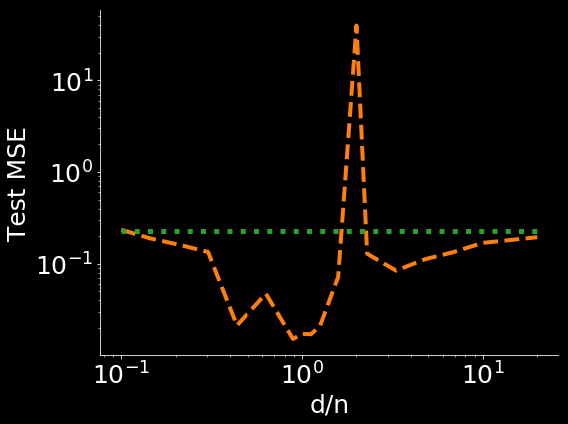

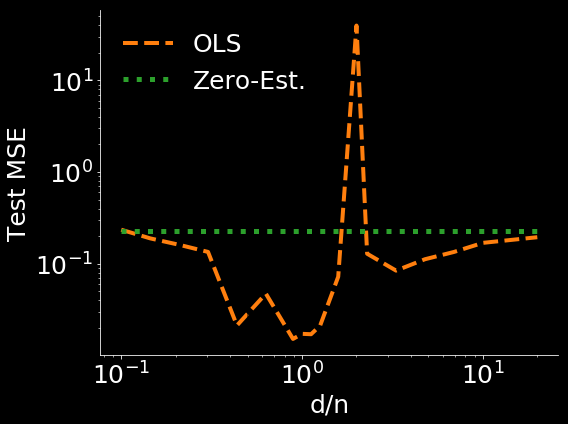

In [16]:
save_fig = False
for prefix in ['identity', 'cosine']:
    if "identity" in prefix:
        suffix = '(Gauss. Des., '
    else:
        suffix = '(Cos. Des., '
    
    if 'high_dim' in prefix:
        d_star = 400./200
        suffix += '$d_\star > n$, '
    else:
        d_star = 100./200
        suffix += '$d_\star < n$, '
        

    for noise_std in [0.1]:        
        results = pickle.load(open("ridge_%s_sigma_%d_new_bias_variance.txt"%(prefix, noise_std), "rb"))
        for fig_suffix, title_suffix in zip(['fig/'+prefix+str(int(noise_std))+'detailed_', 'fig/'+prefix+str(int(noise_std))], 
                                            [suffix+'$\sigma = %.1f$)'%noise_std, '']):
            for j, n in enumerate(results['ns']):
                plt.figure(figsize=[8, 6])
#                 plt.loglog(results["gammas"], results["mse_test"].mean(0)[:, j], color=cs[0], label='Ridge', linestyle='-', linewidth=4.)
                plt.loglog(results["gammas"], results["ols_test"].mean(0)[:, j], color=cs[1], label='OLS', linestyle='--', linewidth=4.)
                plt.semilogx(results["gammas"], results["zero_err"]*np.ones_like(results["gammas"]), label='Zero-Est.', linestyle=':', color=cs[2], linewidth=5.)
                plt.axvline(d_star, linestyle='--', color='k', alpha=.5, linewidth=3.)
                plt.xlabel('d/n')
                plt.ylabel(r'Test MSE')
                if title_suffix == "":
                    plt.legend(frameon=False)
                else:
                    pass
                ax = plt.gca()
                ax.spines['top'].set_visible(False)
                ax.spines['right'].set_visible(False)
#                 plt.grid(True, alpha=0.5, linewidth=1.)
                plt.tight_layout()
                if save_fig:
                    plt.savefig(fig_suffix+'test_mse.pdf')
#                     plt.close()
                plt.show()


#                 plt.figure(figsize=[8, 6])
#                 plt.loglog(results["gammas"], results["t_pred_bias"][:, j], label='Bias', linestyle='-', linewidth=4., marker='D', markersize=8, alpha=1. ,color=cs[0])
#                 plt.loglog(results["gammas"], results["t_pred_variance"][:, j], label='Variance', linestyle=':', linewidth=4., marker='*', markersize=12, alpha=1. ,color=cs[0])
#                 plt.axvline(d_star, linestyle='--', color='k', alpha=.5, linewidth=3.)
#                 plt.xlabel('d/n')
#                 plt.title(r'Ridge %s'%title_suffix)
#                 plt.legend(frameon=False)
#                 plt.grid(True, alpha=0.5, linewidth=1.)
#                 plt.tight_layout()
#                 if save_fig:
#                     plt.savefig(fig_suffix+'bias_variance_ridge.pdf')
#                     plt.close()
# #                 plt.show()

#                 plt.figure(figsize=[8, 6])
#                 plt.loglog(results["gammas"], results["ols_pred_bias"][:, j], label='Bias', linestyle='-', linewidth=4., marker='D', markersize=8, alpha=1. ,color=cs[1])
#                 plt.loglog(results["gammas"], results["ols_pred_variance"][:, j], label='Variance', linestyle=':', linewidth=4., marker='*', markersize=12, alpha=1. ,color=cs[1])
#                 plt.axvline(d_star, linestyle='--', color='k', alpha=.5, linewidth=3.)
#                 plt.xlabel('d/n')
#                 plt.title(r'OLS %s'%title_suffix)
#                 plt.legend(frameon=False)
#                 plt.grid(True, alpha=0.5, linewidth=1.)
#                 plt.tight_layout()
#                 if save_fig:
#                     plt.savefig(fig_suffix+'bias_variance_ols.pdf')
#                     plt.close()
# #                 plt.show()

In [38]:
for ff, (file, noise_std) in enumerate(zip(['decay_mdl_n_200_noise_0.txt'], [.1])):
    mdlcomp = pickle.load(open(file, 'rb'))

In [40]:
mdlcomp["rmt_mdl_comp_2"].mean(0)[0, :, 0, 0, 0]

array([0.53832032, 2.61959102, 4.92646689, 5.97812919, 7.02704407,
       7.79509936])

In [42]:
results[prefix]["gammas"]

array([ 0.1       ,  0.14454398,  0.20892961,  0.30199517,  0.43651583,
        0.63095734,  0.89125094,  1.        ,  1.12201845,  1.25892541,
        1.58489319,  2.        ,  2.29086765,  3.31131121,  4.78630092,
        6.91830971, 10.        , 20.        ])

In [24]:
save_fig = False
results = {}
for prefix in ['identity', 'cosine']:
    for noise_std in [0.1]:        
        results[prefix] = pickle.load(open("ridge_%s_sigma_%d_new_bias_variance.txt"%(prefix, noise_std), "rb"))

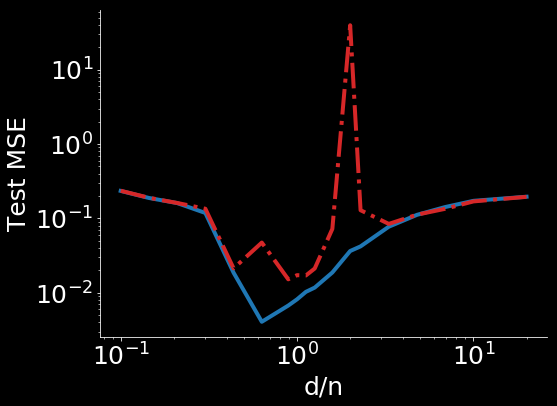

In [37]:
plt.figure(figsize=[8, 6])
for j, n in enumerate(results["identity"]['ns']):
    plt.loglog(results["cosine"]["gammas"], results["cosine"]["mse_test"].mean(0)[:, j], color=cs[0], label='Ridge', linestyle='-', linewidth=4.)
#     plt.loglog(results["identity"]["gammas"], results["identity"]["ols_test"].mean(0)[:, j], color=cs[1], label='OLS', linestyle='--', linewidth=4.)
#     plt.semilogx(results["identity"]["gammas"], results["identity"]["zero_err"]*np.ones_like(results["identity"]["gammas"]), label='Zero-Est.', linestyle=':', color=cs[2], linewidth=5.)
# #                     plt.axvline(d_star, linestyle='--', color='w', alpha=.5, linewidth=3.)
#     plt.semilogx(results["cosine"]["gammas"], results["cosine"]["zero_err"]*np.ones_like(results["cosine"]["gammas"]), label='Zero-Est.', linestyle=':', color=cs[2], linewidth=5.)
#                     plt.axvline(d_star, linestyle='--', color='w', alpha=.5, linewidth=3.)
    plt.loglog(results["cosine"]["gammas"], results["cosine"]["ols_test"].mean(0)[:, j], color=cs[3], label='OLS_cos', linestyle='-.', linewidth=4.)
    plt.xlabel('d/n')
    plt.ylabel(r'Test MSE')
#     plt.legend(frameon=False)
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
#                 plt.grid(True, alpha=0.5, linewidth=1.)
#                     plt.tight_layout()
    if save_fig:
        plt.savefig(fig_suffix+'test_mse.pdf')
#                     plt.close()
#                     plt.show()


#                 plt.figure(figsize=[8, 6])
#                 plt.loglog(results["gammas"], results["t_pred_bias"][:, j], label='Bias', linestyle='-', linewidth=4., marker='D', markersize=8, alpha=1. ,color=cs[0])
#                 plt.loglog(results["gammas"], results["t_pred_variance"][:, j], label='Variance', linestyle=':', linewidth=4., marker='*', markersize=12, alpha=1. ,color=cs[0])
#                 plt.axvline(d_star, linestyle='--', color='k', alpha=.5, linewidth=3.)
#                 plt.xlabel('d/n')
#                 plt.title(r'Ridge %s'%title_suffix)
#                 plt.legend(frameon=False)
#                 plt.grid(True, alpha=0.5, linewidth=1.)
#                 plt.tight_layout()
#                 if save_fig:
#                     plt.savefig(fig_suffix+'bias_variance_ridge.pdf')
#                     plt.close()
# #                 plt.show()

#                 plt.figure(figsize=[8, 6])
#                 plt.loglog(results["gammas"], results["ols_pred_bias"][:, j], label='Bias', linestyle='-', linewidth=4., marker='D', markersize=8, alpha=1. ,color=cs[1])
#                 plt.loglog(results["gammas"], results["ols_pred_variance"][:, j], label='Variance', linestyle=':', linewidth=4., marker='*', markersize=12, alpha=1. ,color=cs[1])
#                 plt.axvline(d_star, linestyle='--', color='k', alpha=.5, linewidth=3.)
#                 plt.xlabel('d/n')
#                 plt.title(r'OLS %s'%title_suffix)
#                 plt.legend(frameon=False)
#                 plt.grid(True, alpha=0.5, linewidth=1.)
#                 plt.tight_layout()
#                 if save_fig:
#                     plt.savefig(fig_suffix+'bias_variance_ols.pdf')
#                     plt.close()
# #                 plt.show()